Playing around with plotting the Mandelbrot set again.

Recall that the Mandelbrot set is the set of complex numbers $c$ for which the function $f_{c}(z) = z^{2} + c$ does not diverge when iterated from $z = 0$.

Here, I have assumed that the sequence $z_{n}$ is not bounded if the modulus of one of its terms is greater than 2. Ok? Ok.

And, I will use the number of iterations to reach the above definition of "unboundedness" to determine the color of the pixel on the plot.

Not clear?

Don't worry. Just go through the jupyter notebook, and you'll get it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ColorNumber(num_iter):
    if num_iter<=1: MyColorNum = 0
    elif num_iter==2: MyColorNum = 1
    elif num_iter==3: MyColorNum = 2
    elif num_iter>=4 and num_iter<=6: MyColorNum = 3
    elif num_iter>=7 and num_iter<=10: MyColorNum = 4
    elif num_iter>=11 and num_iter<=30: MyColorNum = 5
    elif num_iter>=31 and num_iter<=40: MyColorNum = 6
    elif num_iter>=41 and num_iter<=50: MyColorNum = 7
    elif num_iter>=51 and num_iter<=60: MyColorNum = 8
    elif num_iter>=61 and num_iter<=70: MyColorNum = 9
    elif num_iter>=71: MyColorNum = 10
    return MyColorNum

In [3]:
def ColorName(cc):
    ColorName_List = ["yellow", "orange", "mediumslateblue", "darkslateblue",
                      "slateblue", "blue", "mediumblue", "darkblue",
                      "navy", "midnightblue", "black"]
    ColorName = ColorName_List[cc]
    return ColorName

In [4]:
w_left, w_right = -2.5, 1.5
w_bottom, w_top = -1.5, 1.5

In [5]:
max_iter = 100

In [6]:
NumOfPixels = 101

In [7]:
ColorMatrix = np.zeros((NumOfPixels, NumOfPixels), dtype=int)

In [8]:
%%time
for y_j, y in enumerate(np.linspace(w_bottom, w_top, NumOfPixels)):
    for x_i, x in enumerate(np.linspace(w_left, w_right, NumOfPixels)):
        c = np.complex(x, y)
        n = 0
        z = 0
        while abs(z)<2 and n<max_iter:
            z = z*z + c
            n += 1
        ColorMatrix[x_i, y_j] = ColorNumber(n)

CPU times: user 99.3 ms, sys: 1.81 ms, total: 101 ms
Wall time: 101 ms


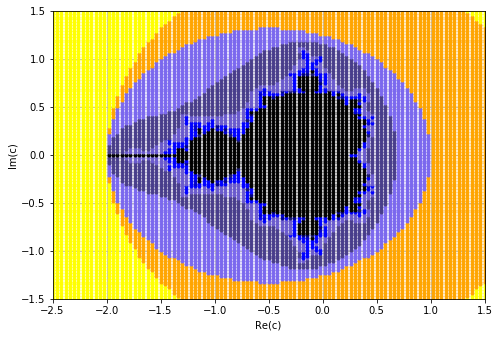

CPU times: user 1min 27s, sys: 487 ms, total: 1min 27s
Wall time: 1min 28s


In [9]:
%%time
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for y_j, y in enumerate(np.linspace(w_bottom, w_top, NumOfPixels)):
    for x_i, x in enumerate(np.linspace(w_left, w_right, NumOfPixels)):
        MyColor = ColorName(ColorMatrix[x_i, y_j])
        ax.plot(x, y, ".", color=MyColor)

ax.set_xlabel("Re(c)")
ax.set_ylabel("Im(c)")

ax.set_xlim([w_left, w_right])
ax.set_ylim([w_bottom, w_top])
ax.grid(True)
plt.show()